In [1]:
from qcutils.credential import load_provider
from qcutils.benchmarks import QASMBenchmark
from qcutils.pulse import CircAmpTimeSeries

import matplotlib.pyplot as plt
import numpy as np

provider = load_provider()
backend = provider.get_backend("ibm_lagos")

bm = QASMBenchmark(r"E:\Research\QASMBench", "small", num_qubits_list=list(range(8)), remove_final_measurements=True, do_transpile=True, backend=backend, seed_transpiler=0)

In [2]:
print(bm)

Index	Circuit Name		Qubits	Gates	CX
0	deutsch_n2              2	10	1
1	dnn_n2                  2	306	42
2	grover_n2               2	15	2
3	ipea_n2                 2	101	30
4	iswap_n2                2	14	2
5	quantumwalks_n2         2	38	3
6	basis_change_n3         3	85	10
7	fredkin_n3              3	31	17
8	linearsolver_n3         3	26	4
9	qaoa_n3                 3	35	9
10	teleportation_n3        3	12	2
11	toffoli_n3              3	24	9
12	wstate_n3               3	47	21
13	adder_n4                4	33	16
14	basis_trotter_n4        4	2353	582
15	bell_n4                 4	53	7
16	cat_state_n4            4	6	3
17	hs4_n4                  4	28	4
18	inverseqft_n4           4	30	0
19	qft_n4                  4	50	18
20	qrng_n4                 4	12	0
21	variational_n4          4	58	16
22	vqe_n4                  4	73	9
23	vqe_uccsd_n4            4	238	88
24	error_correctiond3_n5   5	249	61
25	lpn_n5                  5	17	2
26	pea_n5                  5	126	57
27	qec_en_n5               5	52	16
28

In [43]:
circ_name_list = []
power_time_series_list = []
for circ_name, circ in zip(bm.circ_name_list, bm.circ_list):
    try:
        power_time_series_list.append(CircAmpTimeSeries.from_circ(circ, backend).total())
        circ_name_list.append(circ_name)
    except:
        continue

energy_list = [np.sum(power_timeseries) for power_timeseries in power_time_series_list]
mean_power_list = [np.mean(power_timeseries) for power_timeseries in power_time_series_list]
total_duration_list = [len(power_timeseries) for power_timeseries in power_time_series_list]

In [27]:
def plot_bm_info(data_type, filepath = None):
    if data_type == "Energy":
        data = energy_list
    elif data_type == "Mean Power":
        data = mean_power_list
    elif data_type == "Duration":
        data = total_duration_list
    # plt.figure(figsize=(5, 3))
    plt.bar(circ_name_list, data)
    plt.ylabel(data_type)
    plt.xticks(rotation=90)
    plt.tight_layout()

    if filepath:
        plt.savefig(filepath)

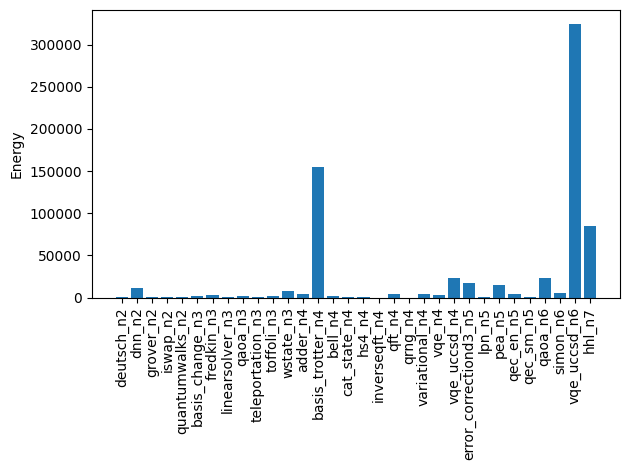

In [44]:
plot_bm_info("Energy", filepath=r"E:\Research\quantum-computing-power-side-channel-attacks\paper\figure\bm_energy.pdf")

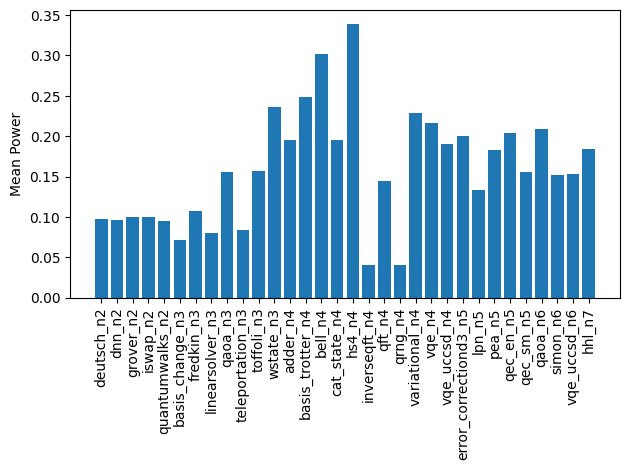

In [38]:
plot_bm_info("Mean Power", filepath=r"E:\Research\quantum-computing-power-side-channel-attacks\paper\figure\bm_mean_power.pdf")

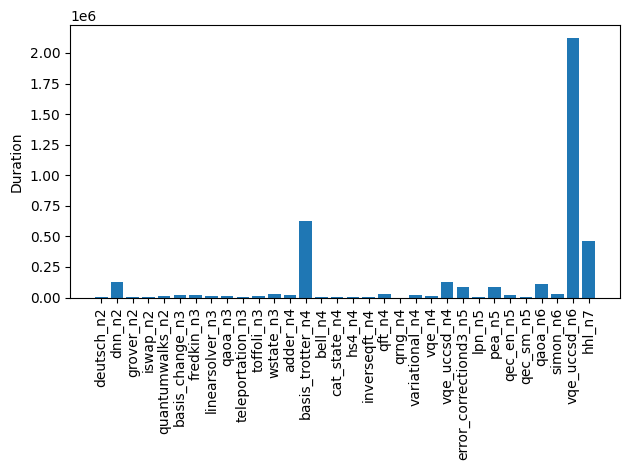

In [39]:
plot_bm_info("Duration", filepath=r"E:\Research\quantum-computing-power-side-channel-attacks\paper\figure\bm_duration.pdf")

In [68]:
from qiskit import transpile, schedule
import itertools
circ_list = [transpile(QASMBenchmark(r"E:\Research\QASMBench", "small", num_qubits_list=list(range(8)), remove_final_measurements=True)[2], backend, initial_layout=initial_layout) for initial_layout in list(itertools.permutations(range(7), 2))]
grover_total_list = [CircAmpTimeSeries.from_circ(circ, backend).total() for circ in circ_list]
grover_mean_power_list = [np.mean(grover_total) for grover_total in grover_total_list ]

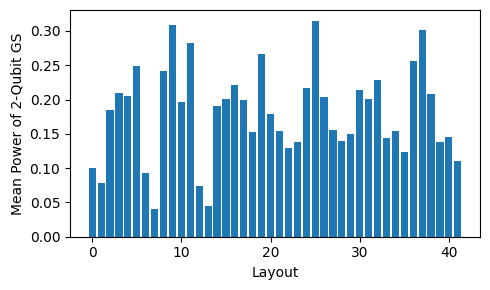

In [71]:
plt.figure(figsize=(5, 3))
plt.bar(range(len(grover_mean_power_list)), grover_mean_power_list)
plt.ylabel("Mean Power of 2-Qubit GS")
# plt.xticks(None)
plt.xlabel("Layout")
plt.tight_layout()

plt.savefig(r"E:\Research\quantum-computing-power-side-channel-attacks\paper\figure\grover_mean_power.pdf")